In [4]:
import os, os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = [20, 10]

<h3>Create dataframe by combining csv and case files located in /data folder</h3>

In [5]:
dataPath = os.getcwd() + '/data/data3/'
caseCount = len(os.listdir(dataPath))
data = []
try:
    os.remove(dataPath + ".DS_Store")
except:
    print("No file DS_Store")
for filename in os.listdir(dataPath):
    f = open(os.path.join(dataPath, filename), encoding='utf-8')
    data.append([filename.replace('.txt', ''), f.read()])

verdict_df = pd.DataFrame(data, columns=['Case ID', 'Case Text'])
cases_df = pd.read_csv('./cases3.csv', usecols = ['GerechtelijkProductType', 'Case ID', 'Proceduresoorten', 'Publicatiedatum', 'Rechtsgebieden', 'Tekstfragment', 'Titel', 'Uitspraakdatum', 'UitspraakdatumType'])
merged_df = cases_df.join(verdict_df.set_index('Case ID'), on='Case ID', how='left')


No file DS_Store


<h3>Function to count mentions of keywords in court cases</h3>

In [6]:
def count_mentions(word_arr):
    dates = []
    counts = []
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current["Uitspraakdatum"]
        
        current_case_text = current['Case Text']
        occurrences = 0
        for i in word_arr:
            occurrences = occurrences + current_case_text.lower().count(i.lower())
        dates.append(current_date)
        counts.append(occurrences)

    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results

<h4>And function to count total cases</h4>

In [7]:
def count_cases(word_arr):
    dates = []
    counts = []
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current['Uitspraakdatum']
        current_case_text = current['Case Text']
        occurrences = 0
        if any(x.lower() in current_case_text.lower() for x in word_arr):
            occurrences = 1
        dates.append(current_date)
        counts.append(occurrences)
    
    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results

<h4>Example of mentions of XTC and related keywords in court cases</h4>

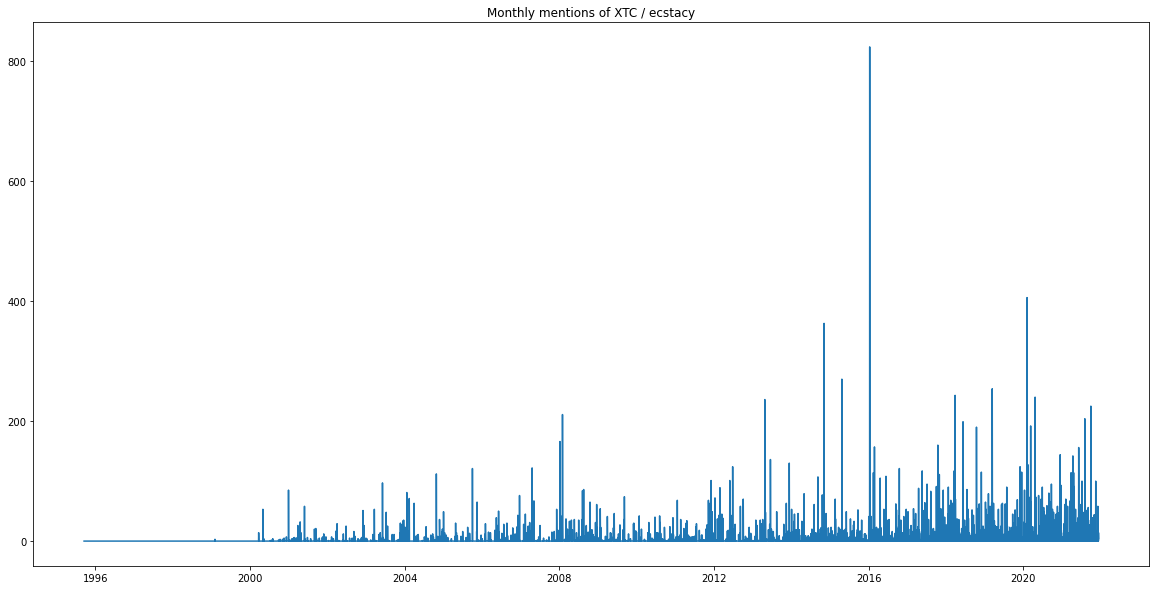

In [4]:
mdma_results = count_mentions(['XTC', 'ecstacy', 'mdma'])
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
daily_mdma_result = mdma_results.resample('1D').sum()

plt.plot(daily_mdma_result[6000:])
plt.title("Monthly mentions of XTC / ecstacy")
plt.show()

<p>As you can see, there is a large spike in 2016, we can see what cases mentioned the keywords a lot.</p>

In [5]:
def get_case_that_exceed_count(word_arr, count):
    case_id = []
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_case_text = current['Case Text']
        occurrences = 0
        for i in word_arr:
            occurrences = occurrences + current_case_text.lower().count(i.lower())
        if(occurrences > count):
            parsedId = current['Case ID'].replace('-', ':')
            print(occurrences , ':', parsedId, current['Uitspraakdatum'])
            case_id.append(parsedId)
        
    return case_id

In [6]:
case = get_case_that_exceed_count(['XTC', 'ecstacy', 'mdma'], 120)

218 : ECLI:NL:RBGEL:2016:6445 01-12-2016
134 : ECLI:NL:RBGEL:2016:6494 01-12-2016
174 : ECLI:NL:RBGEL:2016:6468 01-12-2016
161 : ECLI:NL:RBGEL:2016:6469 01-12-2016
129 : ECLI:NL:GHSHE:2015:1521 24-04-2015
141 : ECLI:NL:GHSHE:2015:1522 24-04-2015
150 : ECLI:NL:RBOVE:2021:607 10-02-2021


Go to https://uitspraken.rechtspraak.nl/inziendocument?id= + case id 

<h1>Sewage data from ERIC</h1>https://opendata.eawag.ch/dataset/illicit-drugs-in-wastewater-score-initiative

Text(0.5, 1.0, 'MDMA in wastewater in NL')

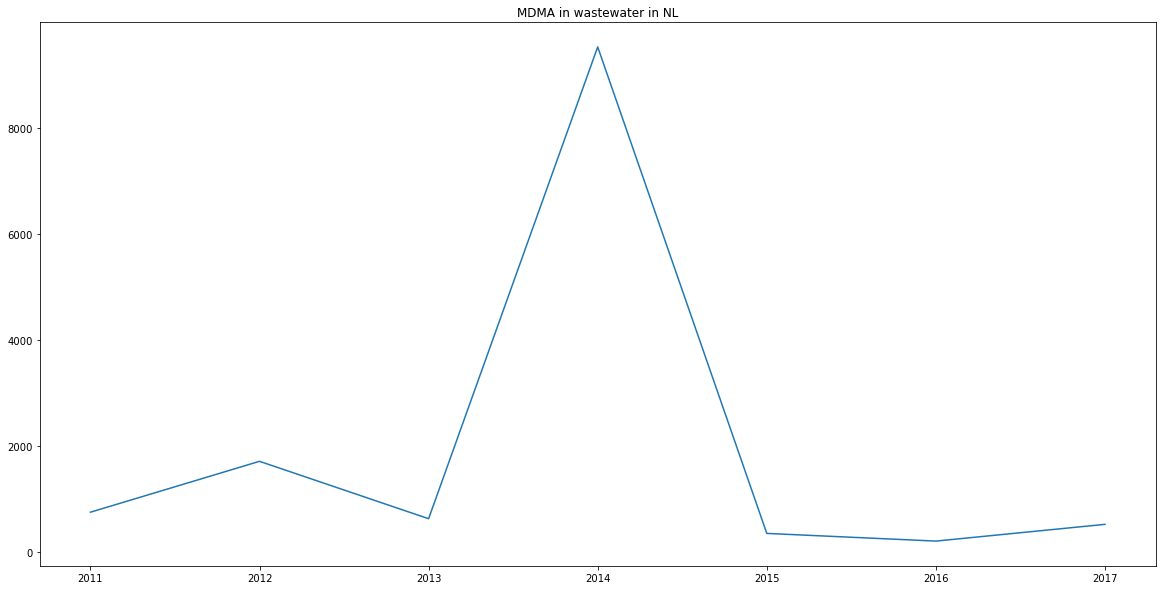

In [7]:
mdma_wastewater = pd.read_csv('./sewerdata/score_mdma_wastewater_loads_2011_2017.csv', delimiter=';')
mdma_wastewater = pd.DataFrame(mdma_wastewater).fillna(0)
nl_mdma_wastewater = mdma_wastewater.loc[mdma_wastewater['country'] == 'NL']
nl_mdma_wastewater = nl_mdma_wastewater.append(nl_mdma_wastewater.sum(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
nl_mdma_wastewater = nl_mdma_wastewater.drop(columns = columns_to_drop)
nl_mdma_wastewater = nl_mdma_wastewater.iloc[5][2:]
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
nl_mdma_wastewater.index = new_index

# print(nl_mdma_wastewater)
plt.plot(nl_mdma_wastewater)
plt.title("MDMA in wastewater in NL")


Text(0.5, 1.0, 'Amphetamine in wastewater in NL')

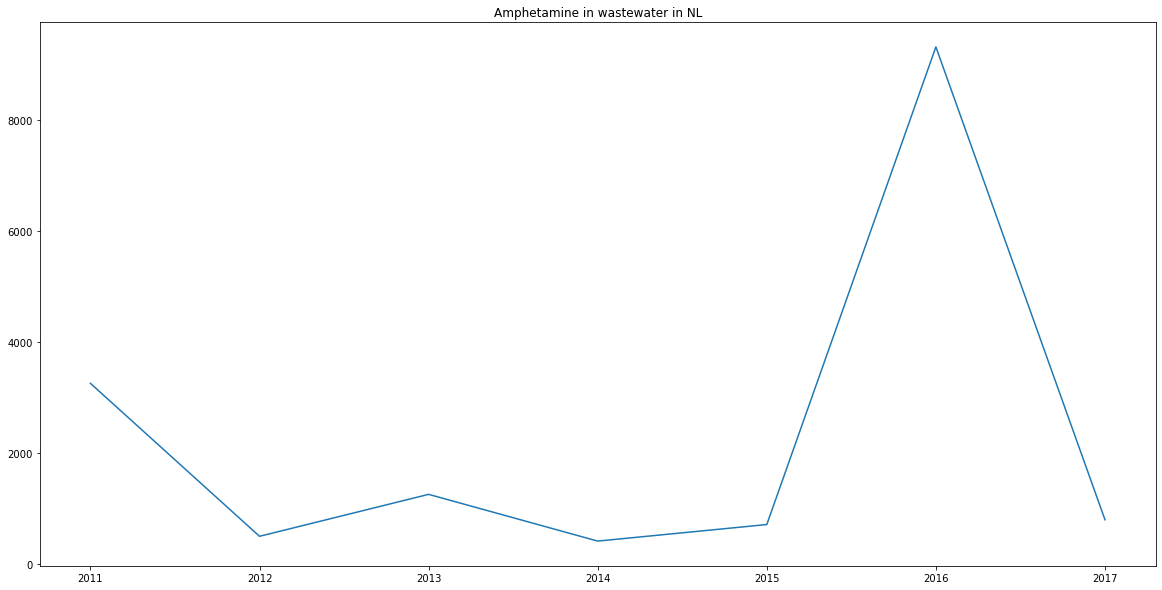

In [8]:
amphetamine_wastewater = pd.read_csv('./sewerdata/score_amphetamine_wastewater_loads_2011_2017.csv', delimiter=';')
amphetamine_wastewater = pd.DataFrame(amphetamine_wastewater).fillna(0)

nl_amphetamine_wastewater = amphetamine_wastewater.loc[amphetamine_wastewater['country'] == 'NL']
nl_amphetamine_wastewater = nl_amphetamine_wastewater.append(nl_amphetamine_wastewater.sum(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
nl_amphetamine_wastewater = nl_amphetamine_wastewater.drop(columns = columns_to_drop)
nl_amphetamine_wastewater = nl_amphetamine_wastewater.iloc[5][2:9]
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
nl_amphetamine_wastewater.index = new_index

# print(nl_amphetamine_wastewater)
plt.plot(nl_amphetamine_wastewater)
plt.title("Amphetamine in wastewater in NL")



Both spikes (2014 mdma and 2016 amphetamines) are in Eindhoven

Text(0.5, 1.0, 'Drugs found in wastewater in mg/1000 per person/day')

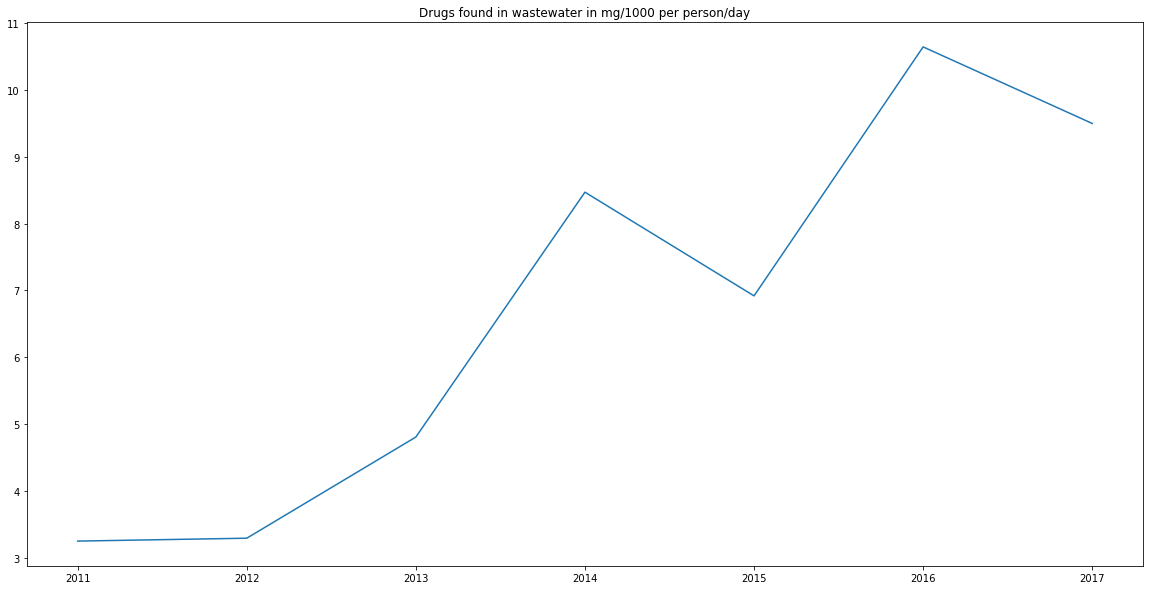

In [9]:
combined_wastewater = pd.read_csv('./sewerdata/score_combined_doses_2011_2017.csv', delimiter=';')
combined_wastewater = pd.DataFrame(combined_wastewater).fillna(0)

total_combined_wastewater = combined_wastewater
total_combined_wastewater = total_combined_wastewater.append(total_combined_wastewater.mean(numeric_only=True), ignore_index=True)
columns_to_drop = ['2011 population', '2012 population','2013 population','2014 population','2015 population','2016 population','2017 population']
total_combined_wastewater = total_combined_wastewater.drop(columns = columns_to_drop)
total_combined_wastewater = total_combined_wastewater[["2011 mean", "2012 mean","2013 mean","2014 mean","2015 mean","2016 mean","2017 mean"]]
total_combined_wastewater = total_combined_wastewater.iloc[-1]
new_index = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
total_combined_wastewater.index = new_index

plt.plot(total_combined_wastewater, label="Wastewater")
plt.title("Drugs found in wastewater in mg/1000 per person/day")

<h1>Data from 'Wastewater analysis and drugs — a European multi-city study' </h1>https://www.emcdda.europa.eu/publications/html/pods/waste-water-analysis_en#source-data 

In [10]:
yearIndex = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

<h3> Amphetamines NL Daily</h3>

In [11]:
amphetamine_2011 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2011.csv', delimiter=',')
amphetamine_2012 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2012.csv', delimiter=',')
amphetamine_2013 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2013.csv', delimiter=',')
amphetamine_2014 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2014.csv', delimiter=',')
amphetamine_2015 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2015.csv', delimiter=',')
amphetamine_2016 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2016.csv', delimiter=',')
amphetamine_2017 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2017.csv', delimiter=',')
amphetamine_2018 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2018.csv', delimiter=',')
amphetamine_2019 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2019.csv', delimiter=',')
amphetamine_2020 = pd.read_csv('./sewerdata/emcdda/amphetamine/WW-data-amphetamine-2020.csv', delimiter=',')

amphetamine_2011_NL_daily = amphetamine_2011[amphetamine_2011['country'] == "NL"][['Daily mean']]
amphetamine_2011_NL_daily_mean = amphetamine_2011_NL_daily.mean().iloc[0]

amphetamine_2012_NL_daily = amphetamine_2012[amphetamine_2012['country'] == "NL"][['Daily mean']]
amphetamine_2012_NL_daily_mean = amphetamine_2012_NL_daily.mean().iloc[0]

amphetamine_2013_NL_daily = amphetamine_2013[amphetamine_2013['country'] == "NL"][['Daily mean']]
amphetamine_2013_NL_daily_mean = amphetamine_2013_NL_daily.mean().iloc[0]

amphetamine_2014_NL_daily = amphetamine_2014[amphetamine_2014['country'] == "NL"][['Daily mean']]
amphetamine_2014_NL_daily_mean = amphetamine_2014_NL_daily.mean().iloc[0]

amphetamine_2015_NL_daily = amphetamine_2015[amphetamine_2015['country'] == "NL"][['Daily mean']]
amphetamine_2015_NL_daily_mean = amphetamine_2015_NL_daily.mean().iloc[0]

amphetamine_2016_NL_daily = amphetamine_2016[amphetamine_2016['country'] == "NL"][['Daily mean']]
amphetamine_2016_NL_daily_mean = amphetamine_2016_NL_daily.mean().iloc[0]

amphetamine_2017_NL_daily = amphetamine_2017[amphetamine_2017['country'] == "NL"][['Daily mean']]
amphetamine_2017_NL_daily_mean = amphetamine_2017_NL_daily.mean().iloc[0]

amphetamine_2018_NL_daily = amphetamine_2018[amphetamine_2018['country'] == "NL"][['Daily mean']]
amphetamine_2018_NL_daily_mean = amphetamine_2018_NL_daily.mean().iloc[0]

amphetamine_2019_NL_daily = amphetamine_2019[amphetamine_2019['country'] == "NL"][['Daily mean']]
amphetamine_2019_NL_daily_mean = amphetamine_2019_NL_daily.mean().iloc[0]

amphetamine_2020_NL_daily = amphetamine_2020[amphetamine_2020['country'] == "NL"][['Daily mean']]
amphetamine_2020_NL_daily_mean = amphetamine_2020_NL_daily.mean().iloc[0]

amphetamine_series = pd.Series([amphetamine_2011_NL_daily_mean, amphetamine_2012_NL_daily_mean, amphetamine_2013_NL_daily_mean, amphetamine_2014_NL_daily_mean, amphetamine_2015_NL_daily_mean, amphetamine_2016_NL_daily_mean, amphetamine_2017_NL_daily_mean, amphetamine_2018_NL_daily_mean, amphetamine_2019_NL_daily_mean, amphetamine_2020_NL_daily_mean])
amphetamine_series.index = yearIndex
# plt.plot(amphetamine_series)


<h3>Methamphetamines in NL daily</h3>

In [12]:
methamphetamine_2011 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2011.csv', delimiter=',')
methamphetamine_2012 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2012.csv', delimiter=',')
methamphetamine_2013 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2013.csv', delimiter=',')
methamphetamine_2014 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2014.csv', delimiter=',')
methamphetamine_2015 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2015.csv', delimiter=',')
methamphetamine_2016 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2016.csv', delimiter=',')
methamphetamine_2017 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2017.csv', delimiter=',')
methamphetamine_2018 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2018.csv', delimiter=',')
methamphetamine_2019 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2019.csv', delimiter=',')
methamphetamine_2020 = pd.read_csv('./sewerdata/emcdda/methamphetamine/WW-data-methamphetamine-2020.csv', delimiter=',')

methamphetamine_2011_NL_daily = methamphetamine_2011[methamphetamine_2011['country'] == "NL"][['methamphetamineMean2011']]
methamphetamine_2011_NL_daily_mean = methamphetamine_2011_NL_daily.mean().iloc[0]

methamphetamine_2012_NL_daily = methamphetamine_2012[methamphetamine_2012['country'] == "NL"][['Daily mean']]
methamphetamine_2012_NL_daily_mean = methamphetamine_2012_NL_daily.mean().iloc[0]

methamphetamine_2013_NL_daily = methamphetamine_2013[methamphetamine_2013['country'] == "NL"][['Daily mean']]
methamphetamine_2013_NL_daily_mean = methamphetamine_2013_NL_daily.mean().iloc[0]

methamphetamine_2014_NL_daily = methamphetamine_2014[methamphetamine_2014['country'] == "NL"][['Daily mean']]
methamphetamine_2014_NL_daily_mean = methamphetamine_2014_NL_daily.mean().iloc[0]

methamphetamine_2015_NL_daily = methamphetamine_2015[methamphetamine_2015['country'] == "NL"][['Daily mean']]
methamphetamine_2015_NL_daily_mean = methamphetamine_2015_NL_daily.mean().iloc[0]

methamphetamine_2016_NL_daily = methamphetamine_2016[methamphetamine_2016['country'] == "NL"][['Daily mean']]
methamphetamine_2016_NL_daily_mean = methamphetamine_2016_NL_daily.mean().iloc[0]

methamphetamine_2017_NL_daily = methamphetamine_2017[methamphetamine_2017['country'] == "NL"][['Daily mean']]
methamphetamine_2017_NL_daily_mean = methamphetamine_2017_NL_daily.mean().iloc[0]

methamphetamine_2018_NL_daily = methamphetamine_2018[methamphetamine_2018['country'] == "NL"][['Daily mean']]
methamphetamine_2018_NL_daily_mean = methamphetamine_2018_NL_daily.mean().iloc[0]

methamphetamine_2019_NL_daily = methamphetamine_2019[methamphetamine_2019['country'] == "NL"][['Daily mean']]
methamphetamine_2019_NL_daily_mean = methamphetamine_2019_NL_daily.mean().iloc[0]

methamphetamine_2020_NL_daily = methamphetamine_2020[methamphetamine_2020['country'] == "NL"][['Daily mean']]
methamphetamine_2020_NL_daily_mean = methamphetamine_2020_NL_daily.mean().iloc[0]

methamphetamine_series = pd.Series([methamphetamine_2011_NL_daily_mean, methamphetamine_2012_NL_daily_mean, methamphetamine_2013_NL_daily_mean, methamphetamine_2014_NL_daily_mean, methamphetamine_2015_NL_daily_mean, methamphetamine_2016_NL_daily_mean, methamphetamine_2017_NL_daily_mean, methamphetamine_2018_NL_daily_mean, methamphetamine_2019_NL_daily_mean, methamphetamine_2020_NL_daily_mean])
methamphetamine_series.index = yearIndex
# plt.plot(methamphetamine_series)

<h3>MDMA in NL Daily</h3>

In [13]:
MDMA_2011 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2011.csv', delimiter=',')
MDMA_2012 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2012.csv', delimiter=',')
MDMA_2013 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2013.csv', delimiter=',')
MDMA_2014 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2014.csv', delimiter=',')
MDMA_2015 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2015.csv', delimiter=',')
MDMA_2016 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2016.csv', delimiter=',')
MDMA_2017 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2017.csv', delimiter=',')
MDMA_2018 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2018.csv', delimiter=',')
MDMA_2019 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2019.csv', delimiter=',')
MDMA_2020 = pd.read_csv('./sewerdata/emcdda/MDMA/WW-data-MDMA-2020.csv', delimiter=',')

MDMA_2011_NL_daily = MDMA_2011[MDMA_2011['country'] == "NL"][['Daily mean']]
MDMA_2011_NL_daily_mean = MDMA_2011_NL_daily.mean().iloc[0]

MDMA_2012_NL_daily = MDMA_2012[MDMA_2012['country'] == "NL"][['Daily mean']]
MDMA_2012_NL_daily_mean = MDMA_2012_NL_daily.mean().iloc[0]

MDMA_2013_NL_daily = MDMA_2013[MDMA_2013['country'] == "NL"][['Daily mean']]
MDMA_2013_NL_daily_mean = MDMA_2013_NL_daily.mean().iloc[0]

MDMA_2014_NL_daily = MDMA_2014[MDMA_2014['country'] == "NL"][['Daily mean']]
MDMA_2014_NL_daily_mean = MDMA_2014_NL_daily.mean().iloc[0]

MDMA_2015_NL_daily = MDMA_2015[MDMA_2015['country'] == "NL"][['Daily mean']]
MDMA_2015_NL_daily_mean = MDMA_2015_NL_daily.mean().iloc[0]

MDMA_2016_NL_daily = MDMA_2016[MDMA_2016['country'] == "NL"][['Daily mean']]
MDMA_2016_NL_daily_mean = MDMA_2016_NL_daily.mean().iloc[0]

MDMA_2017_NL_daily = MDMA_2017[MDMA_2017['country'] == "NL"][['Daily mean']]
MDMA_2017_NL_daily_mean = MDMA_2017_NL_daily.mean().iloc[0]

MDMA_2018_NL_daily = MDMA_2018[MDMA_2018['country'] == "NL"][['Daily mean']]
MDMA_2018_NL_daily_mean = MDMA_2018_NL_daily.mean().iloc[0]

MDMA_2019_NL_daily = MDMA_2019[MDMA_2019['country'] == "NL"][['Daily mean']]
MDMA_2019_NL_daily_mean = MDMA_2019_NL_daily.mean().iloc[0]

MDMA_2020_NL_daily = MDMA_2020[MDMA_2020['country'] == "NL"][['Daily mean']]
MDMA_2020_NL_daily_mean = MDMA_2020_NL_daily.mean().iloc[0]

MDMA_series = pd.Series([MDMA_2011_NL_daily_mean, MDMA_2012_NL_daily_mean, MDMA_2013_NL_daily_mean, MDMA_2014_NL_daily_mean, MDMA_2015_NL_daily_mean, MDMA_2016_NL_daily_mean, MDMA_2017_NL_daily_mean, MDMA_2018_NL_daily_mean, MDMA_2019_NL_daily_mean, MDMA_2020_NL_daily_mean])
MDMA_series.index = yearIndex
# plt.plot(MDMA_series)

<h3>Cocaine in NL Daily</h3>

In [14]:
cocaine_2011 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2011.csv', delimiter=',')
cocaine_2012 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2012.csv', delimiter=',')
cocaine_2013 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2013.csv', delimiter=',')
cocaine_2014 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2014.csv', delimiter=',')
cocaine_2015 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2015.csv', delimiter=',')
cocaine_2016 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2016.csv', delimiter=',')
cocaine_2017 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2017.csv', delimiter=',')
cocaine_2018 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2018.csv', delimiter=',')
cocaine_2019 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2019.csv', delimiter=',')
cocaine_2020 = pd.read_csv('./sewerdata/emcdda/cocaine/WW-data-cocaine-2020.csv', delimiter=',')

cocaine_2011_NL_daily = cocaine_2011[cocaine_2011['country'] == "NL"][['Daily mean']]
cocaine_2011_NL_daily_mean = cocaine_2011_NL_daily.mean().iloc[0]

cocaine_2012_NL_daily = cocaine_2012[cocaine_2012['country'] == "NL"][['Daily mean']]
cocaine_2012_NL_daily_mean = cocaine_2012_NL_daily.mean().iloc[0]

cocaine_2013_NL_daily = cocaine_2013[cocaine_2013['country'] == "NL"][['Daily mean']]
cocaine_2013_NL_daily_mean = cocaine_2013_NL_daily.mean().iloc[0]

cocaine_2014_NL_daily = cocaine_2014[cocaine_2014['country'] == "NL"][['Daily mean']]
cocaine_2014_NL_daily_mean = cocaine_2014_NL_daily.mean().iloc[0]

cocaine_2015_NL_daily = cocaine_2015[cocaine_2015['country'] == "NL"][['Daily mean']]
cocaine_2015_NL_daily_mean = cocaine_2015_NL_daily.mean().iloc[0]

cocaine_2016_NL_daily = cocaine_2016[cocaine_2016['country'] == "NL"][['Daily mean']]
cocaine_2016_NL_daily_mean = cocaine_2016_NL_daily.mean().iloc[0]

cocaine_2017_NL_daily = cocaine_2017[cocaine_2017['country'] == "NL"][['Daily mean']]
cocaine_2017_NL_daily_mean = cocaine_2017_NL_daily.mean().iloc[0]

cocaine_2018_NL_daily = cocaine_2018[cocaine_2018['country'] == "NL"][['Daily mean']]
cocaine_2018_NL_daily_mean = cocaine_2018_NL_daily.mean().iloc[0]

cocaine_2019_NL_daily = cocaine_2019[cocaine_2019['country'] == "NL"][['Daily mean']]
cocaine_2019_NL_daily_mean = cocaine_2019_NL_daily.mean().iloc[0]

cocaine_2020_NL_daily = cocaine_2020[cocaine_2020['country'] == "NL"][['Daily mean']]
cocaine_2020_NL_daily_mean = cocaine_2020_NL_daily.mean().iloc[0]

cocaine_series = pd.Series([cocaine_2011_NL_daily_mean, cocaine_2012_NL_daily_mean, cocaine_2013_NL_daily_mean, cocaine_2014_NL_daily_mean, cocaine_2015_NL_daily_mean, cocaine_2016_NL_daily_mean, cocaine_2017_NL_daily_mean, cocaine_2018_NL_daily_mean, cocaine_2019_NL_daily_mean, cocaine_2020_NL_daily_mean])
cocaine_series.index = yearIndex
# plt.plot(cocaine_series)

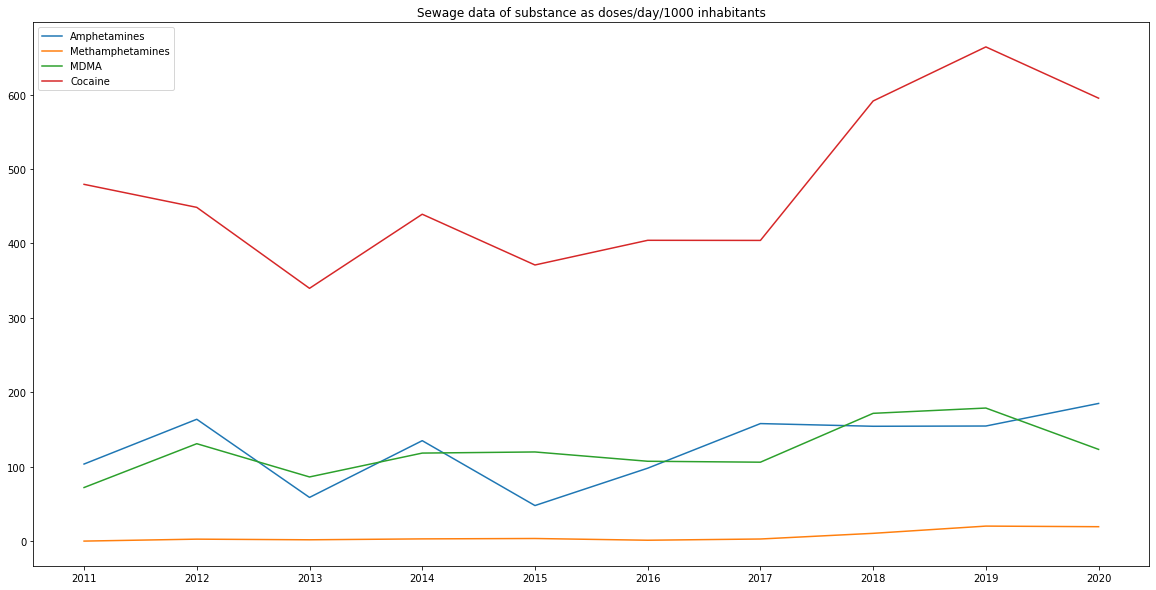

In [15]:
plt.plot(amphetamine_series, label = "Amphetamines")
plt.plot(methamphetamine_series, label = "Methamphetamines")
plt.plot(MDMA_series, label = "MDMA")
plt.plot(cocaine_series, label = "Cocaine")
plt.title("Sewage data of substance as doses/day/1000 inhabitants")
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.show()

<h1>Combining figures to identify trends</h1>

<h3>Following are queries for different drugs, precursors and pre-precursors to identify trends</h3>

In [33]:
print("Precursors:")
safrol_results = count_mentions(['safrol', 'isosafrol', 'safrool', 'isosafrool'])
safrol_results.set_index('date', inplace=True)
safrol_results.index = pd.to_datetime(safrol_results.index)
monthly_safrol_results = safrol_results.resample('1M').sum()
print('Safrol mentions:', monthly_safrol_results['count'].sum())

piperonal_results = count_mentions(['piperonal', 'piperonalglycidaat'])
piperonal_results.set_index('date', inplace=True)
piperonal_results.index = pd.to_datetime(piperonal_results.index)
monthly_piperonal_results = piperonal_results.resample('1M').sum()
print('Piperonal mentions:', monthly_piperonal_results['count'].sum())

PMK_results = count_mentions(['PMK','piperonylmethylketon'])
PMK_results.set_index('date', inplace=True)
PMK_results.index = pd.to_datetime(PMK_results.index)
monthly_PMK_results = PMK_results.resample('1M').sum()
print('PMK mentions:', monthly_PMK_results['count'].sum())

BMK_results = count_mentions(['BMK', 'BenzylMethylKeton'])
BMK_results.set_index('date', inplace=True)
BMK_results.index = pd.to_datetime(BMK_results.index)
monthly_BMK_results = BMK_results.resample('1M').sum()
print('BMK mentions:', monthly_BMK_results['count'].sum())

apaan_results = count_mentions(['apaan','Alpha-Phenylacetoacetonitrile', 'AlphaPhenylacetoacetonitrile'])
apaan_results.set_index('date', inplace=True)
apaan_results.index = pd.to_datetime(apaan_results.index)
monthly_apaan_results = apaan_results.resample('1M').sum()
print('Apaan mentions:', monthly_apaan_results['count'].sum())

GBL_results = count_mentions(['GBL', 'Gamma-butyrolacton'])
GBL_results.set_index('date', inplace=True)
GBL_results.index = pd.to_datetime(GBL_results.index)
monthly_GBL_results = GBL_results.resample('1M').sum()
print('GBL mentions:', monthly_GBL_results['count'].sum())

MDP2P_results = count_mentions(['MDP2P'])
MDP2P_results.set_index('date', inplace=True)
MDP2P_results.index = pd.to_datetime(MDP2P_results.index)
monthly_MDP2P_results = MDP2P_results.resample('1M').sum()
print('MDP2P mentions:', monthly_MDP2P_results['count'].sum())

efedrine_results = count_mentions(['Efedrine', 'Ephedrine'])
efedrine_results.set_index('date', inplace=True)
efedrine_results.index = pd.to_datetime(efedrine_results.index)
monthly_efedrine_results = efedrine_results.resample('1M').sum()
print('Efedrine mentions:', monthly_efedrine_results['count'].sum())

ergotamine_results = count_mentions(['Ergotamine'])
ergotamine_results.set_index('date', inplace=True)
ergotamine_results.index = pd.to_datetime(ergotamine_results.index)
monthly_ergotamine_results = ergotamine_results.resample('1M').sum()
print('Ergotamine mentions:', monthly_ergotamine_results['count'].sum())

lyserginezuur_results = count_mentions(['Lyserginezuur'])
lyserginezuur_results.set_index('date', inplace=True)
lyserginezuur_results.index = pd.to_datetime(lyserginezuur_results.index)
monthly_lyserginezuur_results = lyserginezuur_results.resample('1M').sum()
print('Lyserginezuur mentions:', monthly_lyserginezuur_results['count'].sum())

print("Drugs:")
methamphetamine_results = count_mentions(['Methamfetamine', 'Methamphetamine'])
methamphetamine_results.set_index('date', inplace=True)
methamphetamine_results.index = pd.to_datetime(methamphetamine_results.index)
monthly_methamphetamine_results = methamphetamine_results.resample('1M').sum()
print('Methamphetamine mentions:', monthly_methamphetamine_results['count'].sum())

mdma_results = count_mentions(['MDMA', 'Methylenedioxymethamphetamine'])
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
monthly_mdma_results = mdma_results.resample('1M').sum()
print('MDMA mentions:', monthly_mdma_results['count'].sum())

amphetamine_results = count_mentions(['Amfetamine', 'Amphetamine'])
amphetamine_results.set_index('date', inplace=True)
amphetamine_results.index = pd.to_datetime(amphetamine_results.index)
monthly_amphetamine_results = amphetamine_results.resample('1M').sum()
print('Amphetamine mentions:', monthly_amphetamine_results['count'].sum())

cocaine_results = count_mentions(['Cocaïne', 'Cocaine', 'Coke'])
cocaine_results.set_index('date', inplace=True)
cocaine_results.index = pd.to_datetime(cocaine_results.index)
monthly_cocaine_results = cocaine_results.resample('1M').sum()
print('Cocaine mentions:', monthly_cocaine_results['count'].sum())

xtc_results = count_mentions(['XTC', 'ecstasy'])
xtc_results.set_index('date', inplace=True)
xtc_results.index = pd.to_datetime(xtc_results.index)
monthly_xtc_results = xtc_results.resample('1M').sum()
print('XTC mentions:', monthly_xtc_results['count'].sum())

ghb_results = count_mentions(['GHB', 'gamma-hydroxyboterzuur', '4-hydroxybutaanzuur '])
ghb_results.set_index('date', inplace=True)
ghb_results.index = pd.to_datetime(xtc_results.index)
monthly_ghb_results = xtc_results.resample('1M').sum()
print('GHB mentions:', monthly_xtc_results['count'].sum())

Precursors:
Safrol mentions: 601
Piperonal mentions: 134
PMK mentions: 2024
BMK mentions: 4330
Apaan mentions: 2353
GBL mentions: 1115
MDP2P mentions: 7
Efedrine mentions: 1349
Ergotamine mentions: 55
Lyserginezuur mentions: 16
Drugs:
Methamphetamine mentions: 2850
MDMA mentions: 22571
Amphetamine mentions: 34069
Cocaine mentions: 81387
XTC mentions: 8961
GHB mentions: 8961


In [25]:
amphetamine_series.index = pd.to_datetime(amphetamine_series.index)
methamphetamine_series.index = pd.to_datetime(methamphetamine_series.index)
MDMA_series.index = pd.to_datetime(MDMA_series.index)
cocaine_series.index = pd.to_datetime(cocaine_series.index)


<h3>Plotting</h3>
Skipped records = 220 for beginning of mentions and 380 for inline with sewage

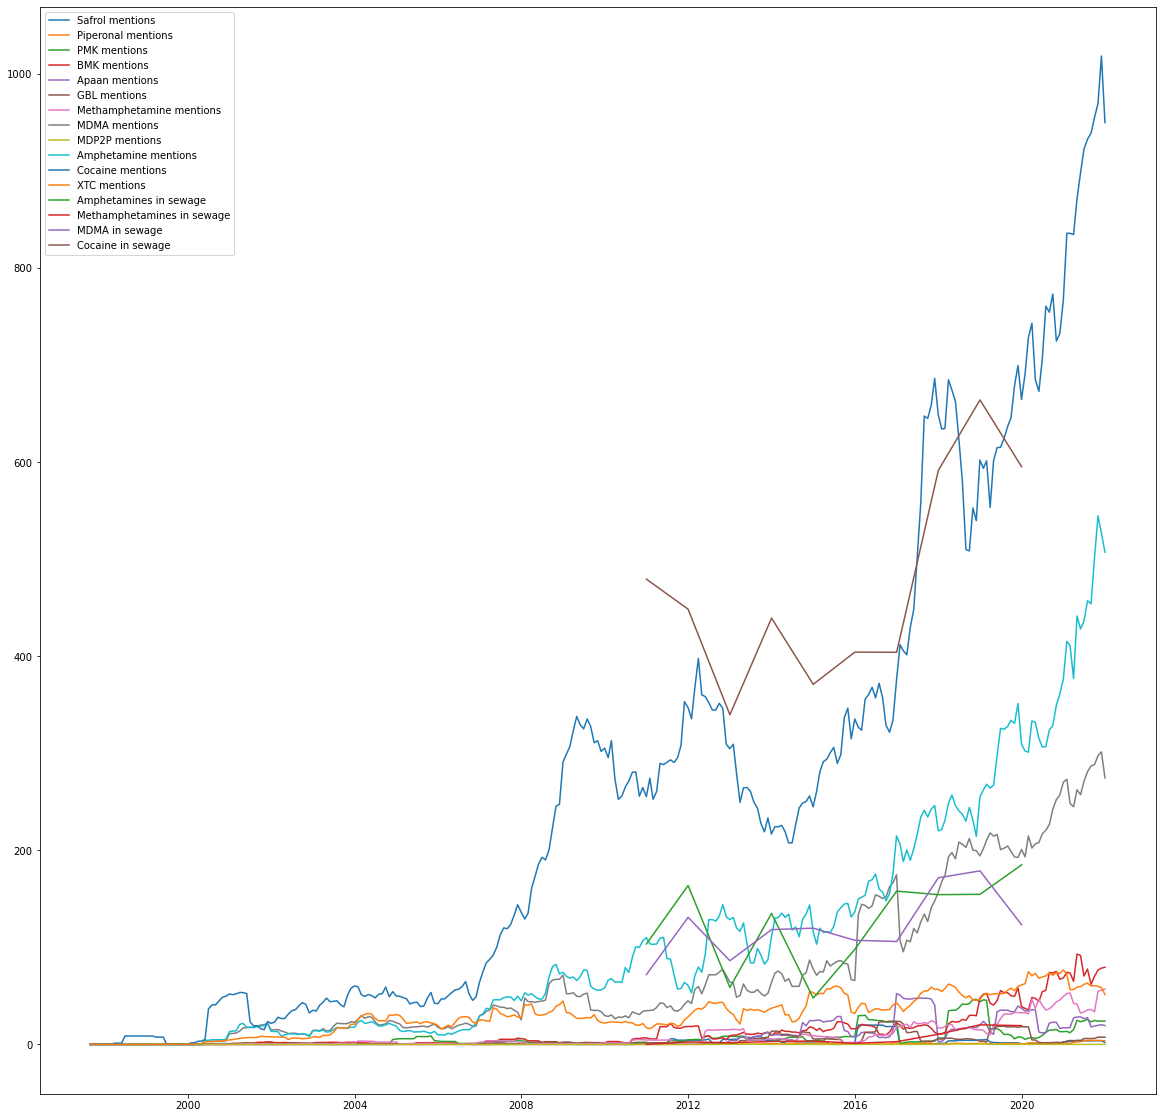

In [29]:
plt.rcParams['figure.figsize'] = [20, 20]
rolling_mean_window = 12
skipped_records = 220

plt.plot(monthly_safrol_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Safrol mentions")
plt.plot(monthly_piperonal_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Piperonal mentions")
plt.plot(monthly_PMK_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="PMK mentions")
plt.plot(monthly_BMK_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="BMK mentions")
plt.plot(monthly_apaan_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Apaan mentions")
plt.plot(monthly_GBL_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="GBL mentions")
plt.plot(monthly_methamphetamine_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Methamphetamine mentions")
plt.plot(monthly_mdma_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="MDMA mentions")
plt.plot(monthly_MDP2P_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="MDP2P mentions")
plt.plot(monthly_amphetamine_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Amphetamine mentions")
plt.plot(monthly_cocaine_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Cocaine mentions")
plt.plot(monthly_xtc_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="XTC mentions")

plt.plot(amphetamine_series, label = "Amphetamines in sewage")
plt.plot(methamphetamine_series, label = "Methamphetamines in sewage")
plt.plot(MDMA_series, label = "MDMA in sewage")
plt.plot(cocaine_series, label = "Cocaine in sewage")

plt.legend()
plt.show()




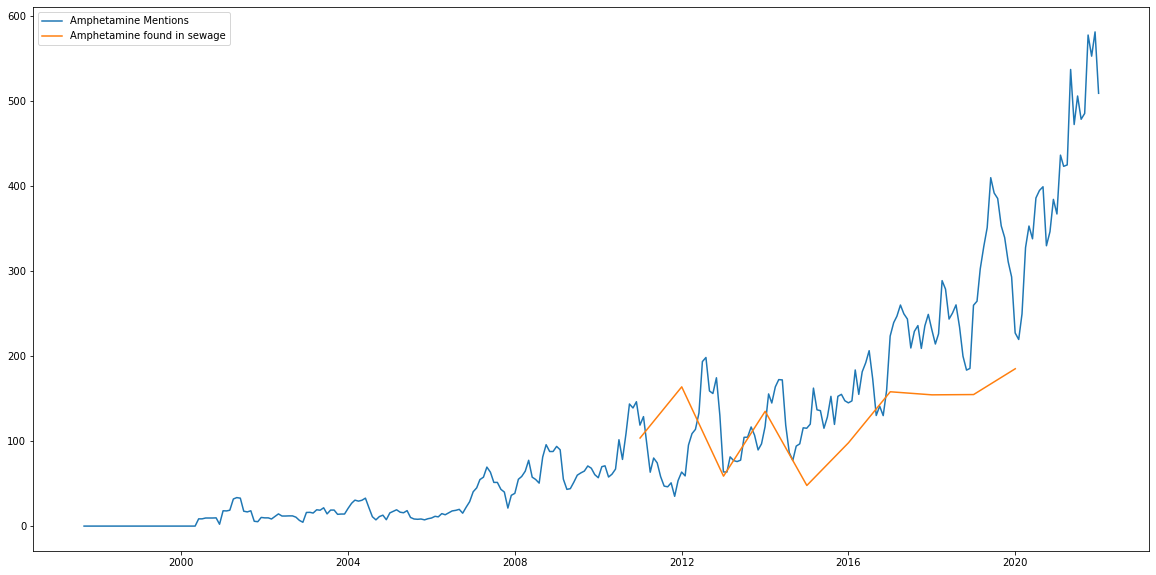

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(monthly_amphetamine_results.rolling(window=6).mean()[220:], label='Amphetamine Mentions')
plt.plot(amphetamine_series, label='Amphetamine found in sewage')
plt.legend()
plt.show()

<h3>Main precursors and pre-precursors</h3>

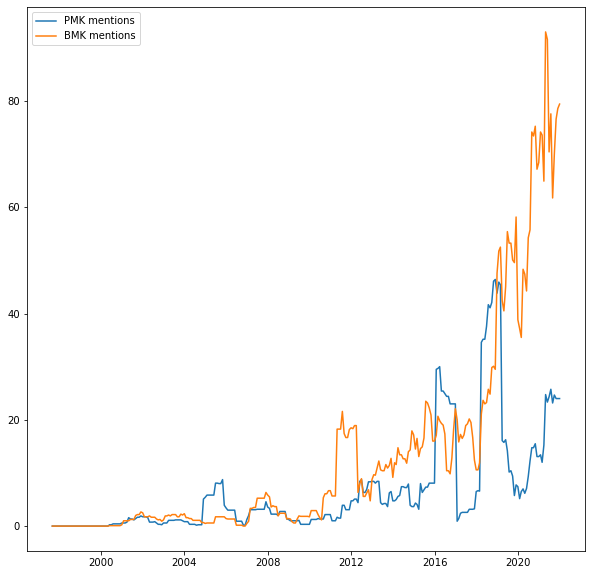

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(monthly_PMK_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="PMK mentions")
plt.plot(monthly_BMK_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="BMK mentions")
plt.legend()
plt.show()

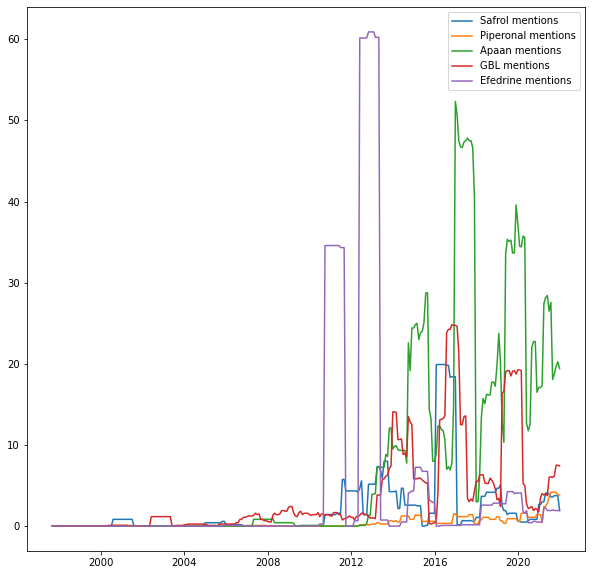

In [38]:
plt.plot(monthly_safrol_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Safrol mentions")
plt.plot(monthly_piperonal_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Piperonal mentions")
plt.plot(monthly_apaan_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Apaan mentions")
plt.plot(monthly_GBL_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="GBL mentions")
plt.plot(monthly_efedrine_results.rolling(window=rolling_mean_window).mean()[skipped_records:], label="Efedrine mentions")

plt.legend()
plt.show()

<h1>TF-IDF and K-Means</h1>

<h2>TF-IDF</h2>
Each term is weighted by dividing the term frequency by the number of documents in the corpus containing the word 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

documents = merged_df["Case Text"]
total_stop_words = stopwords.words('dutch') + stopwords.words('english')
vectorizer = TfidfVectorizer(max_df=0.05, min_df=10, stop_words=total_stop_words , use_idf=True,  lowercase=True)
X = vectorizer.fit_transform(documents)
X = X.astype('float32')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/casbertrams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>K-means Clustering using PCA</h2>

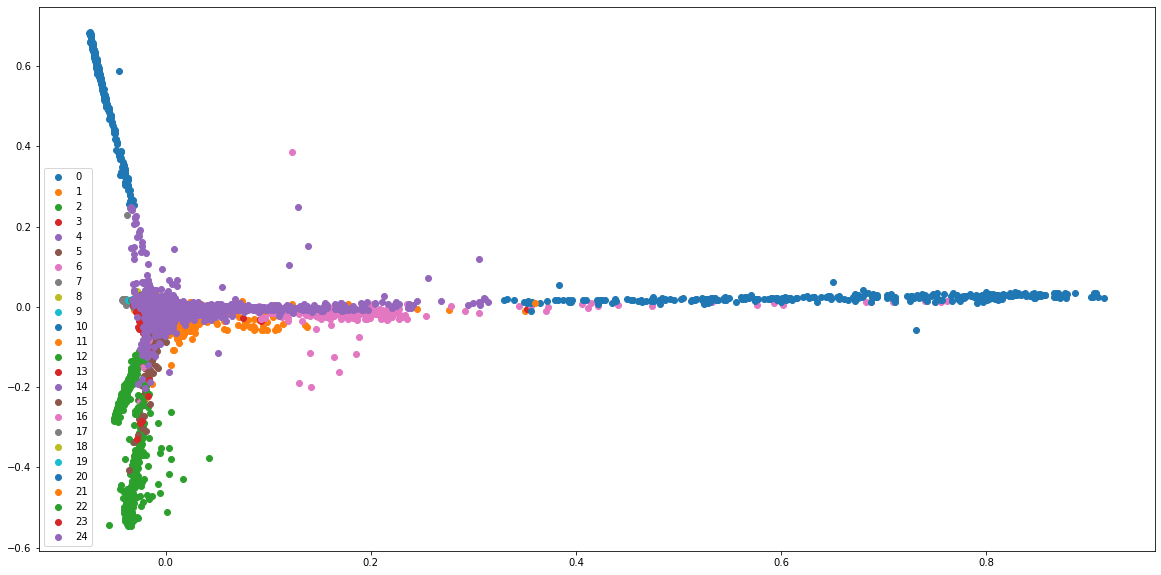

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

true_k = 25
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)

labels = model.fit_predict(X)
merged_df["K means cluster"] = labels

X_array = X.toarray()
pca = PCA(n_components=2).fit(X_array)
XPCA = pca.transform(X_array)

u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(XPCA[labels == i , 0] , XPCA[labels == i , 1] , label = i)
plt.legend()
plt.show()

<h3>Get top terms per cluster</h3>

In [18]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
terms_df = pd.DataFrame()
for i in range(true_k):
    curr = []
    for ind in order_centroids[i, :10]:
        curr.append(terms[ind])
    terms_df[i] = curr

print(terms_df)
terms_df.to_csv("kmeans/K-means top terms per cluster " + str(true_k) + " clusters.csv")


              0              1               2                      3   \
0            isd          penis     verzoekster                     gi   
1  stelselmatige         vagina    verzoeksters          kinderrechter   
2            38m       seksueel    beleidsregel       uithuisplaatsing   
3   tussentijdse     ontuchtige         lokalen             verplichte   
4          fiets           seks     verweerster  ondertoezichtstelling   
5            38s  binnendringen     onverwijlde         zorgmachtiging   
6            38n   verkrachting     leefklimaat                  wvggz   
7    beveiliging     bewustzijn   beleidsregels              jeugdzorg   
8       driemaal    feitelijkhe  woningsluiting           accommodatie   
9     veelpleger        borsten          lokaal              jeugdhulp   

                4               5                      6                7   \
0        container      verzoekers                gerecht             keel   
1       containers     verzoe